# Business Analytics: Optimize marketing expenses 

### Prepared by: Dev Sams

## Table of Contents:
* [Introduction](#intro-bullet)
* [Description of the data](#descrip-bullet)
* [Aim Of the study](#aim-bullet)
* [Libraries used](#lib-bullet)
* [Task 1: Prepare the data ](#task1-bullet)
* [Task 1.1: Visits: Prepare the data](#task1.1-bullet)
* [Task 1.2: Costs:Prepare the data](#task1.2-bullet)
* [Task 1.2: Orders:Prepare the data](#task1.3-bullet)
    
* [Task 2:Product: Make reports and calculate metrics  Prepare the data](#task2-bullet)
* [Task 2.1: How many people use it every day, week, and month?](#task2.1-bullet)
* [Task 2.2: How many sessions are there per day? (One user might have more than one session.)](#task2.2-bullet)
* [Task 2.3: What is the length of each session?](#task2.3-bullet)
* [Task 2.4: How often do users come back?](#task2.4-bullet)    
    
* [Task 3: Sales: Make reports and calculate metrics  Prepare the data ](#task3-bullet)
* [Task 3.1: When do people start buying?](#task3.1-bullet)
* [Task 3.2: How many orders do they make during a given period of time?](#task3.2-bullet)
* [Task 3.3: What is the average purchase size?](#task3.3-bullet)
* [Task 3.4: How much money do they bring? (LTV)](#task3.4-bullet)   
    
* [Task 4: Marketing: Make reports and calculate metrics Marketing: Prepare the data](#task4-bullet)
* [Task 4.1: How much money was spent? Overall/per source/over time](#task4.1-bullet)
* [Task 4.2: How much did customer acquisition from each of the sources cost?](#task4.2-bullet)
* [Task 4.3: How worthwhile where the investments? (ROI)](#task4.3-bullet)

* [Task 5: conclusion: What sources/platforms would you recommend?](#task5-bullet)
* [Task 5.1: Current revenue/costs and user rentention](#task5.1-bullet)
* [Task 5.2: Metrics to view for future investments](#task5.2-bullet)
* [Task 5.3: overall conclusion](#task5.3-bullet)

## Introduction <a class="anchor" id="intro-bullet"></a>

An internship in the analytical department. Task is to help optimize marketing expenses.
    
### Description of the data <a class="anchor" id="descrip-bullet"></a>
- The `visits` table (server logs with data on website visits):

- *Uid* — user's unique identifier
- *Device* — user's device
- *Start Ts* — session start date and time
- *End Ts* — session end date and time
- *Source Id* — identifier of the ad source the user came from

- All dates in this table are in YYYY-MM-DD format.

- The `orders` table (data on orders):

- *Uid* — unique identifier of the user making an order
- *Buy Ts* — order date and time
- *Revenue* — revenue from the order

- The `costs` table (data on marketing expenses):

- source_*id* — ad source identifier
- *dt* — date
- *costs* — expenses on this ad source on this day

### Aim of the study <a class="anchor" id="aim-bullet"></a>
- How people use the product
- When they start to buy
- How much money each customer brings
- When they pay off

### libraries used <a class="anchor" id="lib-bullet"></a>

In [1]:
# Importing libraries 
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt  # We use both matplotlib.pyplot and seaborn for plotting graphs 
import seaborn as sns 
from functools import reduce
from scipy import stats as st
from scipy.stats import ttest_ind
from statsmodels.graphics.gofplots import qqplot
import math
import numpy as np
from numpy.random import seed
from numpy.random import randn
import matplotlib
import matplotlib.pyplot as plt
from operator import attrgetter
import matplotlib.colors as mcolors
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### Task 1: Prepare the data  <a class="anchor" id="task1-bullet"></a>

In [2]:
# Collect data 
visits = pd.read_csv('/Users/DEVSAMS/Downloads/visits_log_us.csv')
orders = pd.read_csv('/Users/DEVSAMS/Downloads/orders_log_us.csv')
costs = pd.read_csv('/Users/DEVSAMS/Downloads/costs_us.csv')
    
# to view memory consumption
visits.info(memory_usage='deep')
print()
orders.info(memory_usage='deep')
print()
costs.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 79.3 MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 4.4 MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 

### Task 1.1: Prepare the data visits_log_us <a class="anchor" id="task1.1-bullet"></a>

In [3]:
# collecting the data 
data_visits = pd.read_csv('/Users/DEVSAMS/Downloads/visits_log_us.csv',
                   dtype={'Uid': str,
                          'Device': str,'source id':str },
                   parse_dates=['Start Ts','End Ts'], 
                   infer_datetime_format=True)

data_visits.columns=data_visits.columns.str.lower()
data_visits.columns# view columns 

Index(['device', 'end ts', 'source id', 'start ts', 'uid'], dtype='object')

In [4]:
data_visits.shape # view the number of rows and columns

(359400, 5)

In [5]:
data_visits.head(5)# to view the first 5 rows of the data

,device,end ts,source id,start ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [6]:
data_visits.info() # to view the data types and check for missing values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  object        
 1   end ts     359400 non-null  datetime64[ns]
 2   source id  359400 non-null  int64         
 3   start ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  object        
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 13.7+ MB


In [7]:
data_visits.duplicated(subset=None, keep='first').sum() # to view duplicates 

0

### Conclusion: 
- The data contains three columns with 359400  rows. 
- No missing values and duplicates.
- the data contains the time sessions per userid with source and device used.  

### Task 1.2: Prepare the data costs_us <a class="anchor" id="task1.2-bullet"></a>

In [8]:
# collecting the data 
data_costs = pd.read_csv('/Users/DEVSAMS/Downloads/costs_us.csv',
                         dtype={'source_id': str },
                         parse_dates=['dt'], 
                   infer_datetime_format=True)

data_costs.columns=data_costs.columns.str.lower()
data_costs.columns

Index(['source_id', 'dt', 'costs'], dtype='object')

In [9]:
data_costs.shape # view the number of rows and columns

(2542, 3)

In [10]:
data_costs.head(5)# to view the first 5 rows of the data

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [11]:
data_costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   object        
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 59.7+ KB


In [12]:
data_costs.duplicated(subset=None, keep='first').sum() # to view duplicates 

0

### Conclusion: 
- The data contains three columns with 2542  rows. 
- No missing values and duplicates.
- the data contains costs with time and source spent on.   

### Task 1.3: Prepare the data  orders_log_us <a class="anchor" id="task1.3-bullet"></a>

In [13]:
# collecting the data
data_orders = pd.read_csv('/Users/DEVSAMS/Downloads/orders_log_us.csv',
                   dtype={'Uid': str},
                   parse_dates=['Buy Ts'], 
                   infer_datetime_format=True)

data_orders.columns=data_orders.columns.str.lower()
data_orders.columns

Index(['buy ts', 'revenue', 'uid'], dtype='object')

In [14]:
data_orders.shape # view the number of rows and columns

(50415, 3)

In [15]:
data_orders.head(5)# to view the first 5 rows of the data

,buy ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [16]:
data_orders.info()  # view the number of rows and columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 1.2+ MB


In [17]:
data_orders.duplicated(subset=None, keep='first').sum() # to view duplicates 

0

### Conclusion: 
- The data contains three columns with 50415 rows. 
- No missing values and duplicates.
- the data contains the revenue per orders with time of purchase. 

### Task 2:Product: Make reports and calculate metrics 
### Product: prepare data  <a class="anchor" id="task2-bullet"></a>

In [18]:
data_visits.head(2) # to view the data

,device,end ts,source id,start ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740


### Task 2.1:  **How many people use it every day, week, and month?** <a class="anchor" id="task2.1-bullet"></a>

In [19]:
# to convert the sessions into years, month, week and date
data_visits['session_year']  = data_visits['start ts'].dt.year
data_visits['session_month'] = data_visits['start ts'].dt.month
data_visits['session_week']  = data_visits['start ts'].dt.week
data_visits['session_date'] = data_visits['start ts'].dt.date

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  after removing the cwd from sys.path.


In [20]:
#to view the number of visits per day
every_day = data_visits.groupby(['session_year','session_date']).agg({'uid': 'nunique'}).mean()
print('Visits per day:',int(every_day))

Visits per day: 907


In [21]:
#to view the number of visits per week
every_week =data_visits.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'}).mean()
print('Visits per week:',int(every_week))

Visits per week: 5716


In [22]:
#to view the number of visits per month
every_month = data_visits.groupby(['session_year', 'session_month']).agg({'uid': 'nunique'}).mean()
print('Visits per month:', int(every_month))

Visits per month: 23228


 To view the sessions in days, weeks and month


<AxesSubplot:xlabel='session_month'>

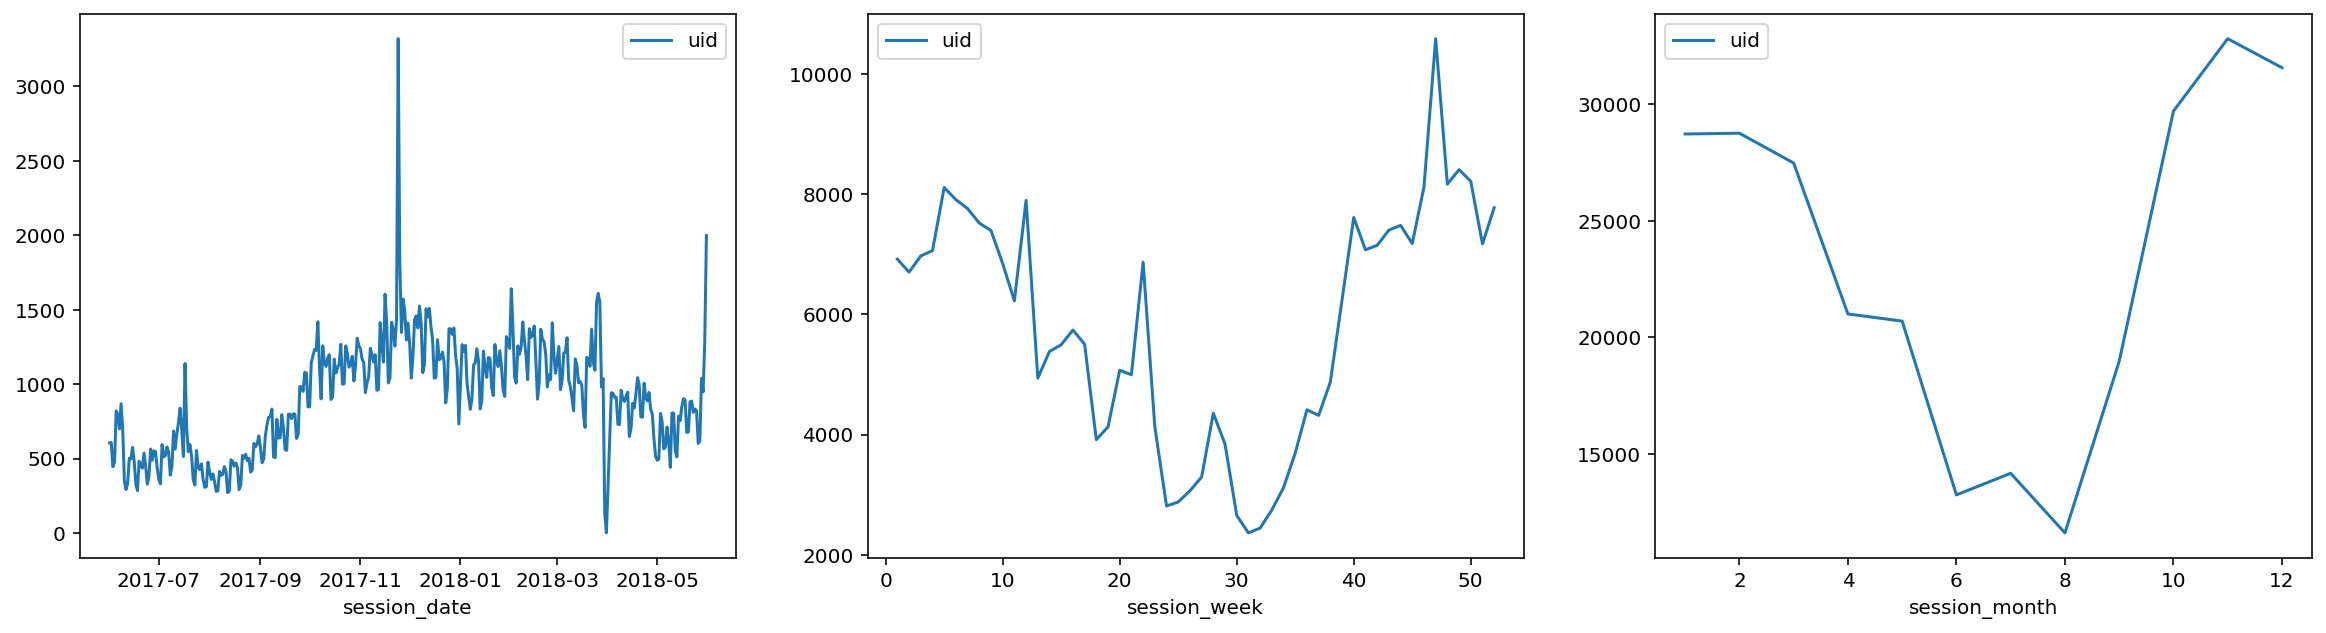

In [23]:
every_day = data_visits.groupby(['session_date']).agg({'uid': 'nunique'})
every_week =data_visits.groupby(['session_week']).agg({'uid': 'nunique'})
every_month = data_visits.groupby(['session_month']).agg({'uid': 'nunique'})
print(' To view the sessions in days, weeks and month')
# plot the represntative line plots 
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
sns.lineplot(data=every_day, ax=ax[0])
sns.lineplot(data=every_week, ax=ax[1])
sns.lineplot(data=every_month, ax=ax[2])

### Conclusions: 
- the average visits in a day are 907
- the average visits in a   week are 5716 
- the average visits in a month are 23228

- We notice that visits are higher in the months between 06/2017 to 08/2017 and later at 4/2018 to 6/2018

### Task 2.2:  **How many sessions are there per day? (One user might have more than one session.)** <a class="anchor" id="task2.2-bullet"></a>

In [95]:
sessions_per_user = data_visits.groupby(['session_year', 'session_date']).agg({'uid': ['count','nunique']})
sessions_per_user.columns = ['n_sessions', 'n_users']
sessions_per_user['sess_per_user'] = sessions_per_user['n_sessions'] / sessions_per_user['n_users']
sessions_per_user.head(4)

n_sessions  n_users  sess_per_user
session_year session_date                                    
2017         2017-06-01           664      605       1.097521
             2017-06-02           658      608       1.082237
             2017-06-03           477      445       1.071910
             2017-06-04           510      476       1.071429

sessions_per_user: 1.1


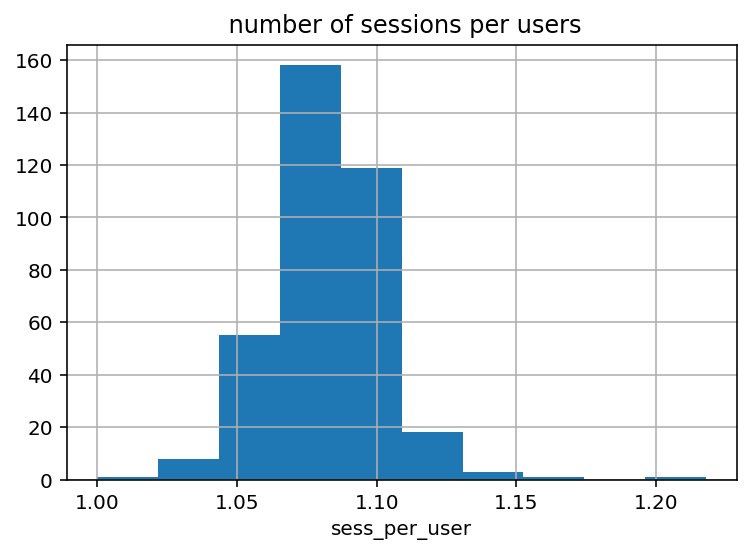

In [25]:
sessions_per_user['sess_per_user'].hist()
plt.title(' number of sessions per users')
plt.xlabel('sess_per_user')
print ('sessions_per_user: {:0.1f}'.format(sessions_per_user['sess_per_user'].mean()))

### Conclusion:
- the session per day is 1.09 per user 

### Task2.3: **What is the length of each session?** <a class="anchor" id="task2.3-bullet"></a>

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


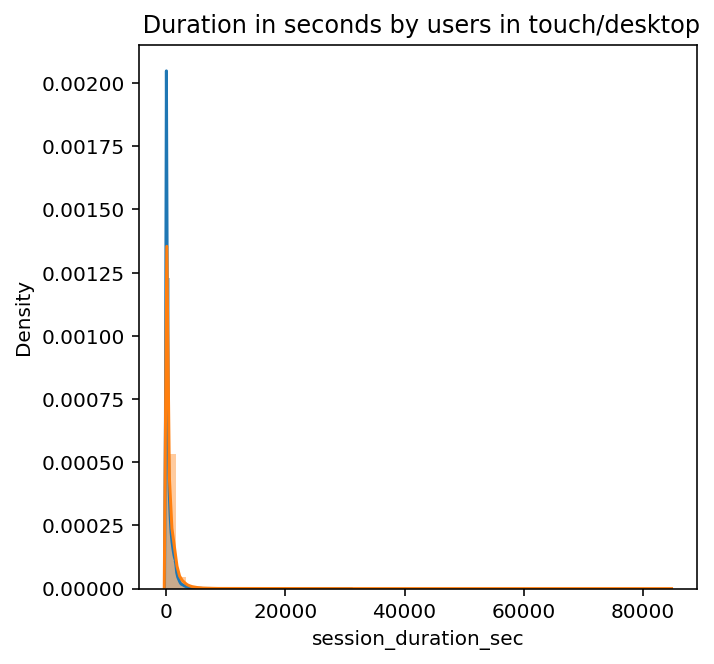

Device touch average duration in seconds: 180.0
Device desktop average duration in seconds: 360.0


In [96]:
data_visits['session_duration_sec'] = (data_visits['end ts'] - data_visits['start ts']).dt.seconds
x=data_visits[data_visits['device'] == 'touch']
y=data_visits[data_visits['device'] == 'desktop']
# display plots 

sns.distplot(x['session_duration_sec'])
sns.distplot(y['session_duration_sec'])
plt.title(' Duration in seconds by users in touch/desktop')
fig = plt.gcf()
fig.set_size_inches( 5, 5)
plt.show()

print('Device touch average duration in seconds: {}'.format(x['session_duration_sec'].median()))
print('Device desktop average duration in seconds: {}'.format(y['session_duration_sec'].median()))

### Conclusion: 
- the Average length of session is 180 seconds touch 
- the Average length of session is 360 seconds desktop 

### Task2.4: **How often do users come back?** <a class="anchor" id="task2.4-bullet"></a>

### to examine the retention of users 

In [27]:
# create month of order and cohort
data_visits['order_month'] = data_visits['start ts'].dt.to_period('M')
data_visits['cohort'] = data_visits.groupby('uid')['start ts'].transform('min').dt.to_period('M') 

In [28]:
# create month of age per customers
df_cohort = data_visits.groupby(['cohort', 'order_month']).agg(n_customers=('uid', 'nunique')).reset_index(drop=False)
df_cohort['age'] = (df_cohort.order_month - df_cohort.cohort).apply(attrgetter('n'))

In [29]:
# pivot the data into a form of the matrix
cohort_pivot = df_cohort.pivot_table(index = 'cohort',
                                     columns = 'age',
                                     values = 'n_customers')
#cohort_pivot=cohort_pivot.append(a, ignore_index=True)
cohort_pivot.fillna('') 

age,0,1,2,3,4,5,6,7,8,9,10,11
cohort,,,,,,,,,,,,
2017-06,13259.0,1043.0,713.0,814.0,909.0,947.0,809.0,766.0,694.0,674.0,539.0,596.0
2017-07,13140.0,737.0,674.0,738.0,765.0,633.0,596.0,601.0,510.0,376.0,361.0,
2017-08,10181.0,783.0,640.0,639.0,510.0,448.0,370.0,402.0,284.0,265.0,,
2017-09,16704.0,1428.0,1156.0,847.0,658.0,632.0,599.0,404.0,381.0,,,
2017-10,25977.0,2042.0,1357.0,1012.0,890.0,837.0,555.0,529.0,,,,
2017-11,27248.0,2133.0,1202.0,1054.0,919.0,638.0,594.0,,,,,
2017-12,25268.0,1410.0,960.0,786.0,512.0,481.0,,,,,,
2018-01,22624.0,1351.0,890.0,565.0,458.0,,,,,,,
2018-02,22197.0,1267.0,565.0,446.0,,,,,,,,


In [30]:
# mean retention rate per columns (cohort ages)
cohort_size = cohort_pivot.iloc[:,0]
retention_matrix = cohort_pivot.divide(cohort_size, axis = 0)

# mean retention rate per columns (cohort ages)
retention_mean_per_age = (retention_matrix.sum(axis=0)/12) # normalizing it so that period number 0 has 100% retention mean and to display precentages later.
retention_mean_per_age

print()
print('retention_matrix with means per age:')
retention_matrix_with_means_per_age = retention_matrix.append(retention_mean_per_age, ignore_index=True)
retention_matrix_with_means_per_age.fillna('')


retention_matrix with means per age:


age,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,0.078664,0.053775,0.061392,0.068557,0.071423,0.061015,0.057772,0.052342,0.050833,0.040652,0.044951
1,1.0,0.056088,0.051294,0.056164,0.058219,0.048174,0.045358,0.045738,0.038813,0.028615,0.027473,
2,1.0,0.076908,0.062862,0.062764,0.050093,0.044004,0.036342,0.039485,0.027895,0.026029,,
3,1.0,0.085489,0.069205,0.050706,0.039392,0.037835,0.03586,0.024186,0.022809,,,
4,1.0,0.078608,0.052239,0.038958,0.034261,0.032221,0.021365,0.020364,,,,
5,1.0,0.078281,0.044113,0.038682,0.033727,0.023415,0.0218,,,,,
6,1.0,0.055802,0.037993,0.031107,0.020263,0.019036,,,,,,
7,1.0,0.059715,0.039339,0.024973,0.020244,,,,,,,
8,1.0,0.05708,0.025454,0.020093,,,,,,,,
9,1.0,0.041818,0.027053,,,,,,,,,


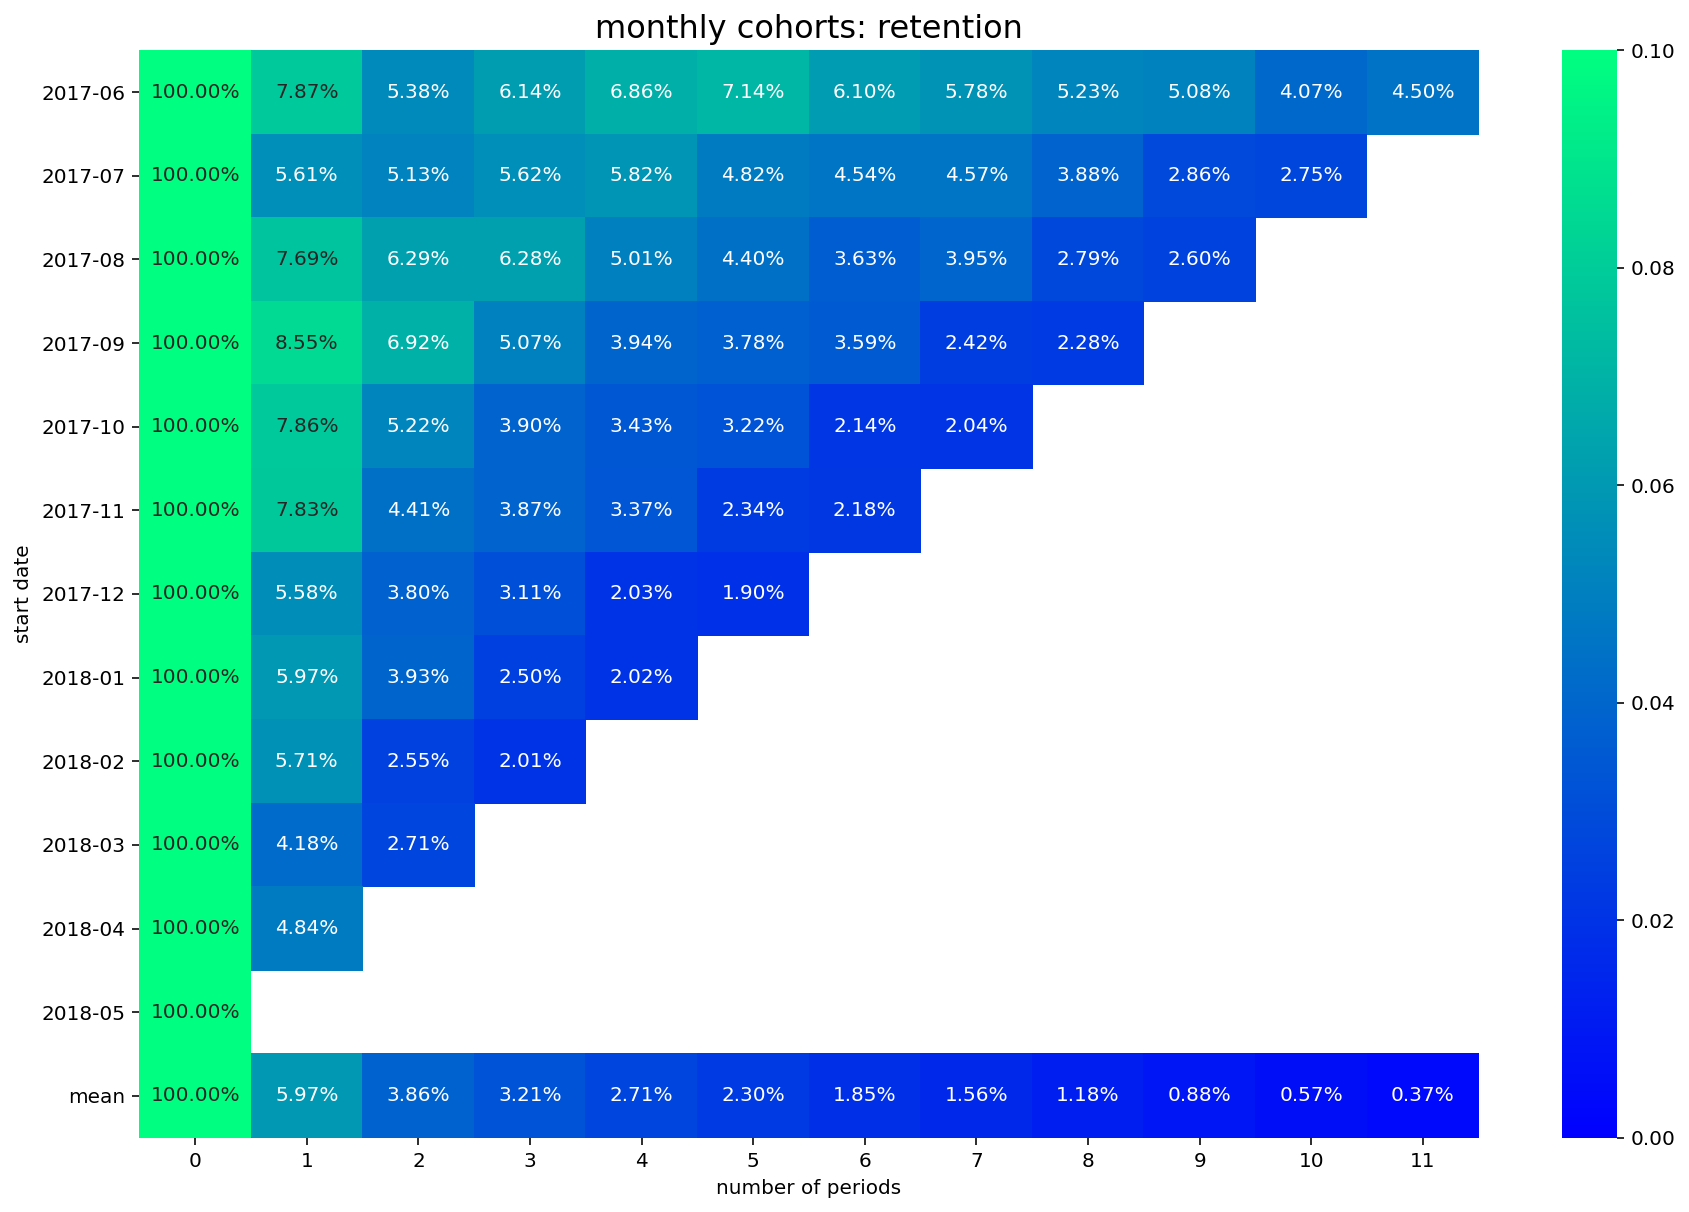

In [31]:
cohort_dates = cohort_pivot.index.to_list()

plt.figure(figsize=(15, 10))
sns.heatmap(retention_matrix_with_means_per_age, 
            mask=retention_matrix_with_means_per_age.isnull(), 
            annot=True, 
            fmt='.2%', 
            cmap='winter', 
            vmin=0, vmax=0.1,
            yticklabels= cohort_dates + ['mean']
           )
plt.yticks(rotation=0) 
plt.title('monthly cohorts: retention', fontsize=16)
plt.xlabel('number of periods')
plt.ylabel('start date')
plt.show()

Text(0.5, 1.0, 'user rentention')

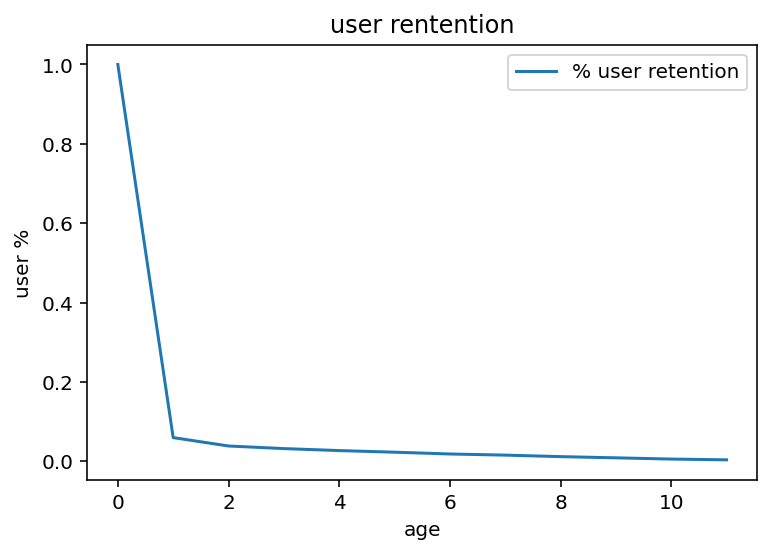

In [32]:
# plot the average rentention rate 

retention_mean_per_age.round(2)
retention_mean_per_age.name = '% user retention'
retention_mean_per_age= retention_mean_per_age.to_frame().reset_index()
retention_mean_per_age.plot(x="age", y=["% user retention"])
plt.ylabel('user %')
plt.title('user rentention')

### Conclusion: 
- The first-month retention rate is decreasing for each new cohort. 
- the second-month retention rate for the cohort was around  6%. 
- the retention drops to average of 3% in the following months 
- this indicates a very bad retention rate

### Task 3 Sales: Make reports and calculate metrics 
### Prepare Data <a class="anchor" id="task3-bullet"></a>

In [33]:
# create first month of visit
first_visit_date_by_customers = data_visits.groupby('uid')['start ts'].min() 
first_visit_date_by_customers.name = 'first_visit_date'
first_visit= first_visit_date_by_customers.to_frame().reset_index()

In [34]:
# create first month of order 
first_order_date_by_customers = data_orders.groupby('uid')['buy ts'].min() 
first_order_date_by_customers.name = 'first_order_date'
first_order= first_order_date_by_customers.to_frame().reset_index()

In [35]:
# create first month of visit and order 
first_visit_orders=pd.merge(first_visit, first_order, on=['uid'])
first_visit_orders.head(5)

,uid,first_visit_date,first_order_date
0,10000837700716403746,2017-06-08 10:12:00,2017-06-21 16:12:00
1,10000997030965831953,2018-01-19 11:16:00,2018-01-19 12:28:00
2,10001199569370567060,2017-11-25 17:26:00,2017-11-25 17:29:00
3,10002243978166172255,2017-10-15 17:18:00,2017-10-15 17:20:00
4,10003351403065971701,2017-11-20 13:17:00,2017-11-20 13:18:00


### Task 3.1 Sales: **When do people start buying?**<a class="anchor" id="task3.1-bullet"></a>

In [36]:
# convert the dates to datetime format
first_visit_orders['first_visit_date'] = pd.to_datetime(first_visit_orders['first_visit_date'])
first_visit_orders['first_order_date'] = pd.to_datetime(first_visit_orders['first_order_date'])
first_visit_orders['difference']= (first_visit_orders['first_order_date']-first_visit_orders['first_visit_date'])
first_visit_orders['session_day'] = first_visit_orders['difference'].dt.days

In [37]:
# for convertions we will look at session day
conditions = [
    (first_visit_orders['session_day'] <= 0),
    (first_visit_orders['session_day'] > 0) & (first_visit_orders['session_day'] <= 7),
    (first_visit_orders['session_day'] > 7) & (first_visit_orders['session_day'] <= 14),
    (first_visit_orders['session_day'] > 14) & (first_visit_orders['session_day']<= 30),
    (first_visit_orders['session_day'] > 30)
    ]
# create values to assign for each condition
values = ['0 day', '7 days', '14 days', '30 days', '30+ days']

# create a new column and use np.select to assign values to it using our lists as arguments
first_visit_orders['days'] = np.select(conditions, values)

# display updated DataFrame
first_visit_orders.head(2)

,uid,first_visit_date,first_order_date,difference,session_day,days
0,10000837700716403746,2017-06-08 10:12:00,2017-06-21 16:12:00,13 days 06:00:00,13,14 days
1,10000997030965831953,2018-01-19 11:16:00,2018-01-19 12:28:00,0 days 01:12:00,0,0 day


,conversions
days,
0 day,72.0
14 days,3.0
30 days,3.0
30+ days,13.0
7 days,8.0


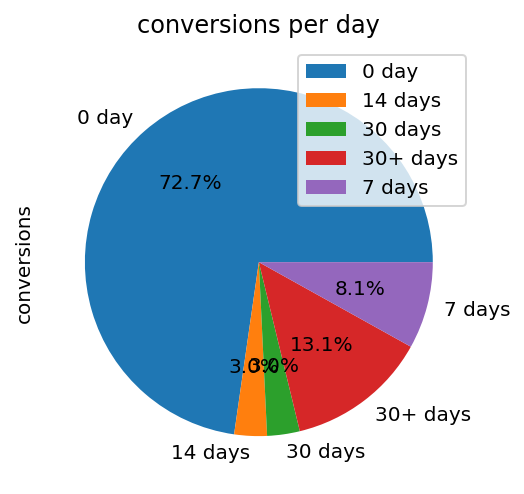

In [38]:
# to plot the conversions
conver=first_visit_orders.groupby('days')['session_day'].count()
conver.name = 'conver'
conver= conver.to_frame().reset_index()
conver['conversions']=((conver['conver']/conver['conver'].sum())*100).round()
convers=conver[['days','conversions']]
convers.set_index('days', inplace=True)
convers.plot.pie(y='conversions',autopct='%1.1f%%',title="conversions per day")
convers

### Conclusion: 
- the conversions on the same day the highest 72%
- the next conversions longer than a month's is 13% 
- the conversion after a week is 8% 
- customers behaviour is similar for two weeks or month at 3%
- this indicates that the customers that visit have a very likely to order in the attempt

### Task3.2:  **How many orders do they make during a given period of time?** <a class="anchor" id="task3.2-bullet"></a>

In [39]:
first_orders = data_orders.groupby(['uid']).agg({'uid': 'count', 'revenue': 'sum'}).rename(columns={'uid': 'orderper'}).reset_index()

In [40]:
ids=first_orders['uid'].unique()
df_ids=list(ids)
df_ids_visits = data_visits.query('uid == @df_ids')
df_ids_visits
result_df = df_ids_visits.drop_duplicates(subset=['uid'], keep='first')
result_df.head(2)

,device,end ts,source id,start ts,uid,session_year,session_month,session_week,session_date,session_duration_sec,order_month,cohort
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,1440,2018-05,2018-03
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017,9,35,2017-09-03,60,2017-09,2017-09


In [41]:
# create a data frame with data_visits and orders 
D1_D2=pd.merge(result_df, first_orders, on=['uid'])

Average orders per monthly 4201.25


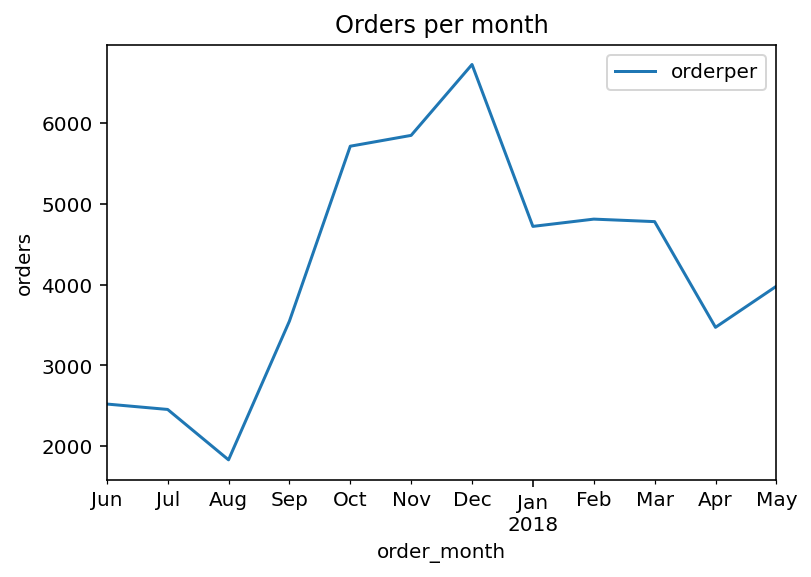

In [42]:
# groupby to plot the order per month  
monthly_orders=D1_D2.groupby('order_month').agg({'orderper': 'sum'}).reset_index()
monthly_orders.plot(x="order_month", y=["orderper"])
plt.ylabel('orders')
plt.title('Orders per month')
print('Average orders per monthly',monthly_orders['orderper'].mean())

### Conclusion: 
- The highest orders were placed in the month between  10/2017 to 12/2017
- the average per month is about 4200 orders 

Average orders per monthly 1.3538213370891587


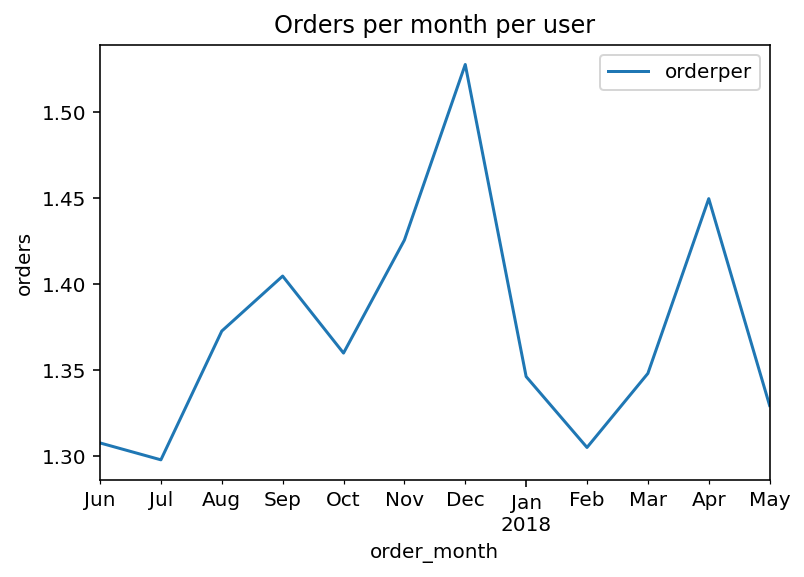

In [43]:

# groupby to plot the order per month per users 
avg_user =D1_D2.groupby('order_month').agg({'orderper': 'mean'}).reset_index()
avg_user .plot(x="order_month", y=["orderper"])
plt.ylabel('orders')
plt.title('Orders per month per user')
print('Average orders per monthly',avg_user ['orderper'].median())

### Task 3.3:  What is the average purchase size? <a class="anchor" id="task3.3-bullet"></a>

In [44]:
# use the data frame with revene and orders 
D1_D2.head(2)

,device,end ts,source id,start ts,uid,session_year,session_month,session_week,session_date,session_duration_sec,order_month,cohort,orderper,revenue
0,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,1440,2018-05,2018-03,1,2.33
1,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017,9,35,2017-09-03,60,2017-09,2017-09,3,5.50


In [45]:
#calculate the revenue per order
D1_D2['revenue_order']=D1_D2['revenue']/D1_D2['orderper']

Text(0.5, 1.0, 'revenue per order ')

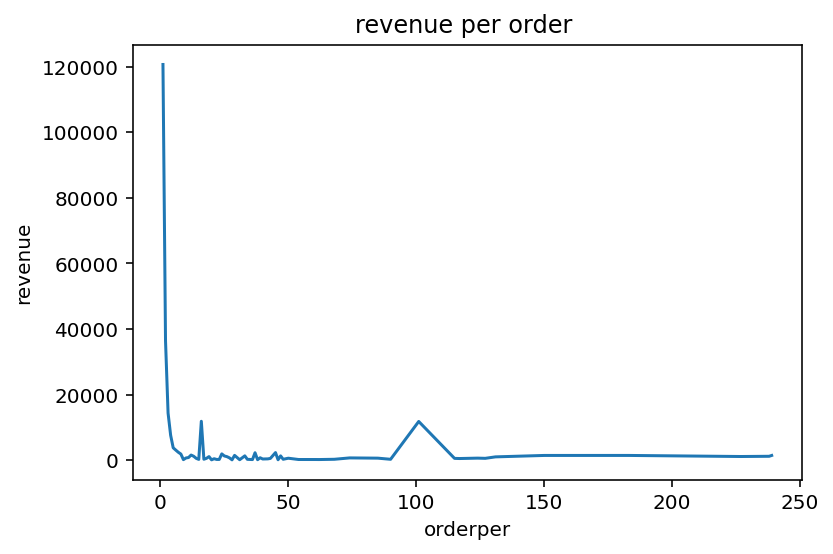

In [46]:
# plot the orders and revenue per orders
orders_revenu = D1_D2.groupby('orderper')['revenue'].sum()
orders_revenu .name = 'orders_revenu'
orders_revenu.plot()
plt.ylabel('revenue')
plt.title('revenue per order ')

### note: most of the orders are around 1

In [47]:
print('average orders size:',(D1_D2['orderper'].median()))
print('average purchase size:',(D1_D2['revenue_order'].median()))

average orders size: 1.0
average purchase size: 2.49


### Conclusion:
- the average purchase size is 2.49
- most of the orders are around 1 orders 

### Task 3.4:  **How much money do they bring? (LTV)** <a class="anchor" id="task3.4-bullet"></a>

In [48]:
# create dataframe with first orders 
first_purchase_dates = data_orders.groupby('uid')['buy ts'].min()
first_purchase_dates.name = 'first_order_datetime'
purchases = data_orders.join(first_purchase_dates,on='uid')
purchases.head(3)

,buy ts,revenue,uid,first_order_datetime
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00


In [49]:
# groupby to the orders to have the initial orders and revenue
purchases['order_month'] = purchases['buy ts'].astype('datetime64[M]')
purchases['first_order_month'] = purchases['first_order_datetime'].astype('datetime64[M]')
purchases_grouped_by_cohorts = purchases.groupby(['first_order_month','order_month']).agg({'uid':'nunique', 'revenue':'sum'}).reset_index()
purchases_grouped_by_cohorts.head(3)

,first_order_month,order_month,uid,revenue
0,2017-06-01,2017-06-01,2023,9557.49
1,2017-06-01,2017-07-01,61,981.82
2,2017-06-01,2017-08-01,50,885.34


In [50]:
# create a dataframe that contains revenue form the first order 
cohorts = purchases_grouped_by_cohorts.groupby(['first_order_month','order_month']).agg({'revenue': 'sum'}).reset_index()
cohorts.head(3)

,first_order_month,order_month,revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34


In [51]:
# groupby to find the number of buyers 
first_orders = data_orders.groupby('uid').agg({'buy ts': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_month']
first_orders['first_order_month'] = first_orders['first_order_month'].astype('datetime64[M]')
first_orders.head(3) 

,uid,first_order_month
0,10000837700716403746,2017-06-01
1,10000997030965831953,2018-01-01
2,10001199569370567060,2017-11-01


In [52]:
#  create cohort size for the first_order_month buyers
cohort_sizes = first_orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']
cohort_sizes['first_order_month'] = cohort_sizes['first_order_month'].astype('datetime64[M]')
cohort_sizes.head(3)

,first_order_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370


In [53]:
# to find the ltv we merge the data 
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')
margin_rate = .5

report['gp'] = report['revenue'] * margin_rate
report['age'] = (report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')
report['ltv'] = report['gp'] / report['n_buyers']
report.head() 

,first_order_month,n_buyers,order_month,revenue,gp,age,ltv
0,2017-06-01,2023,2017-06-01,9557.49,4778.745,0,2.362207
1,2017-06-01,2023,2017-07-01,981.82,490.910,1,0.242664
2,2017-06-01,2023,2017-08-01,885.34,442.670,2,0.218819
3,2017-06-01,2023,2017-09-01,1931.30,965.650,3,0.477336
4,2017-06-01,2023,2017-10-01,2068.58,1034.290,4,0.511265


<AxesSubplot:title={'center':'Average customer purchase size'}, xlabel='age', ylabel='first_order_month'>

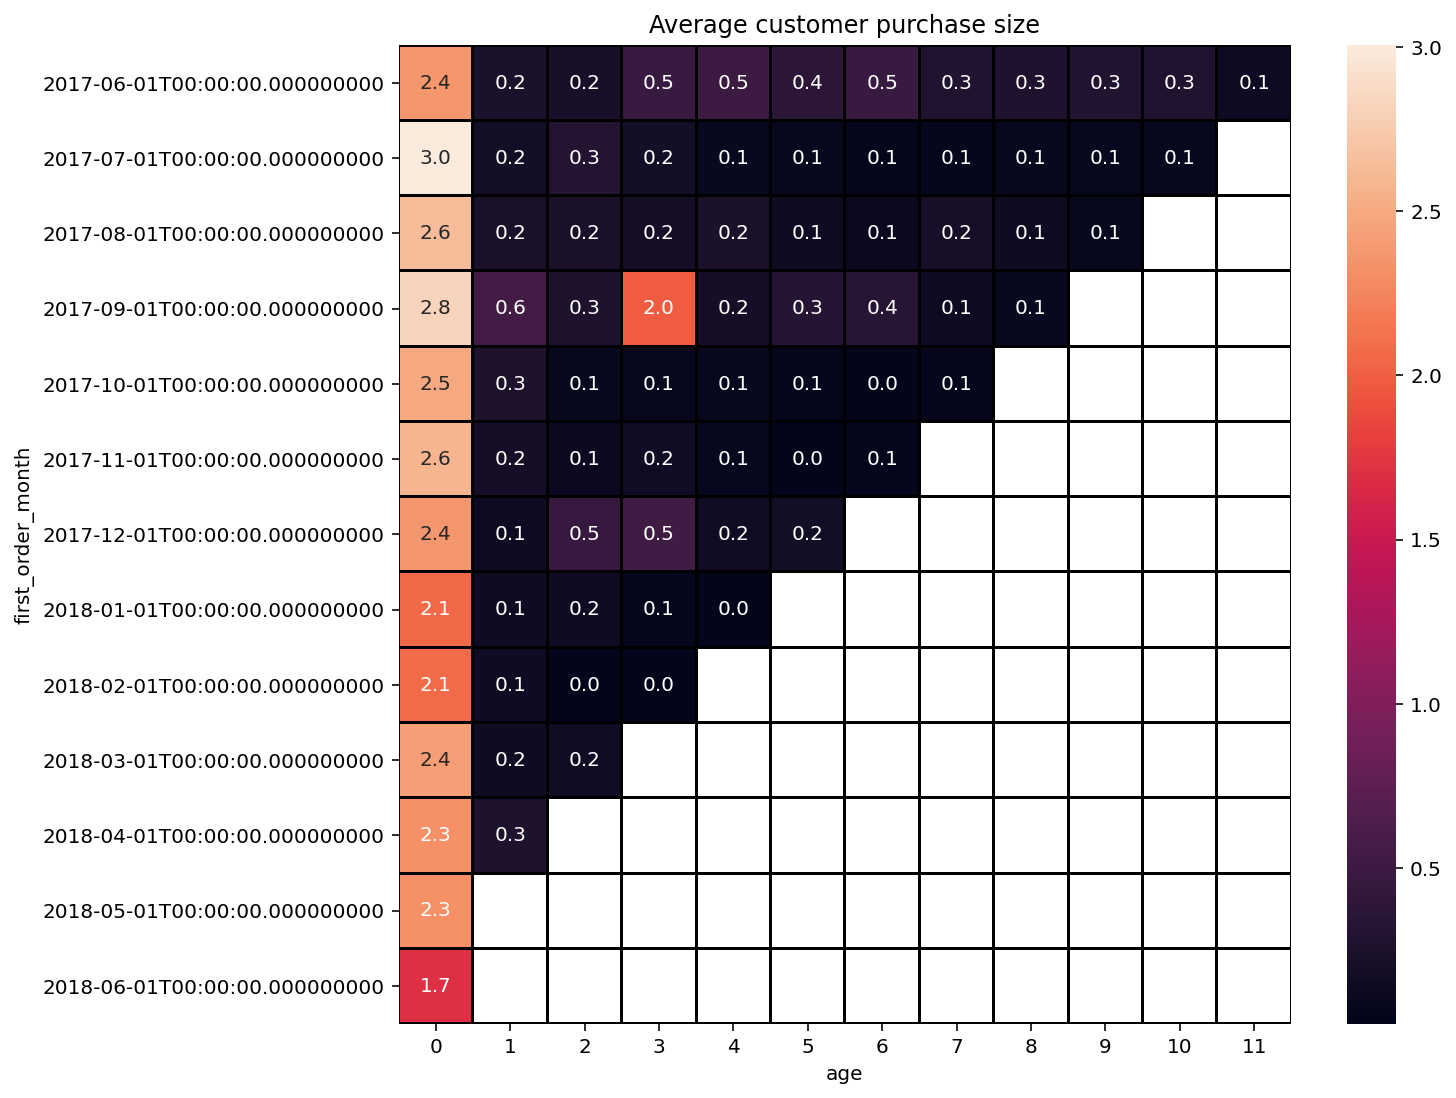

In [54]:
tlv_cal = report.pivot_table(
    index='first_order_month', 
    columns='age', 
    values='ltv', 
    aggfunc='mean')

tlv_cal.fillna('') 

plt.figure(figsize=(10, 9))
plt.title('Average customer purchase size')
sns.heatmap(tlv_cal, annot=True, fmt='.1f', linewidths=1, linecolor='black')

### Note: To view the LTV for a single month

In [55]:
# Calculate the LTV for a single month 
ltv_201706 = tlv_cal.loc['2017-06-01'].sum()
ltv_201706

5.939616905585761

### Note: Life time value (LTV) for the cohort

In [56]:
# the LTV for every lifetime 
tlv_cal.cumsum(axis=1).mean(axis=0)

age
0     2.400841
1     2.697833
2     2.910905
3     3.344881
4     3.649317
5     3.984526
6     4.193843
7     4.541791
8     5.031042
9     4.625670
10    5.002308
11    5.939617
dtype: float64

### Conclusion:
- their is steady increase in life time value over the period. 

### Note: calculate the  customer acquisition cost (CAC)

In [57]:
# to calculate the CAC we need the cost per month
data_costs['month'] = data_costs['dt'].dt.to_period('M')
monthly_costs = data_costs.groupby(['month'])['costs'].sum()
monthly_costs.name='monthly_costs'
monthly_costs= monthly_costs.to_frame().reset_index()
monthly_costs['order_month']=monthly_costs['month']

### Note: calculate the  life-time value and customer acquisition cost (CAC) for a specific month

In [97]:
# calculating costs for the cohort month
cohort_201706 = report[report['first_order_month'] == '2017-06-01']
costs_201706 = data_costs[data_costs['month'] == '2017-06']['costs'].sum()
n_buyers_201706 = cohort_201706['n_buyers'][0]
cac_201706 = costs_201706 / n_buyers_201706
ltv_201706   = tlv_cal.loc['2017-06-01'].sum()
print('For the month of CAC 201706 ={:0.2f}'.format(cac_201706))
print('For the month of LTV 201706 ={:0.2f}'.format( ltv_201706))

For the month of CAC 201706 =8.91
For the month of LTV 201706 =5.94


### Conclusion:
- this shows that the customer acquisition cost is higher than the value they return to the investment

### Note: To calculate the Return of investment (ROI )

In [59]:
# to create dataset that contains LTV and CAC 
report['month']=report['order_month'].dt.to_period('M')
report_ = pd.merge(report, monthly_costs, on=['month'])
report_['cac'] = report_['monthly_costs'] / report_['n_buyers']
report_['roi'] = report_['ltv'] / report_['cac']

<AxesSubplot:title={'center':'return of investment per buyers'}, xlabel='age', ylabel='first_order_month'>

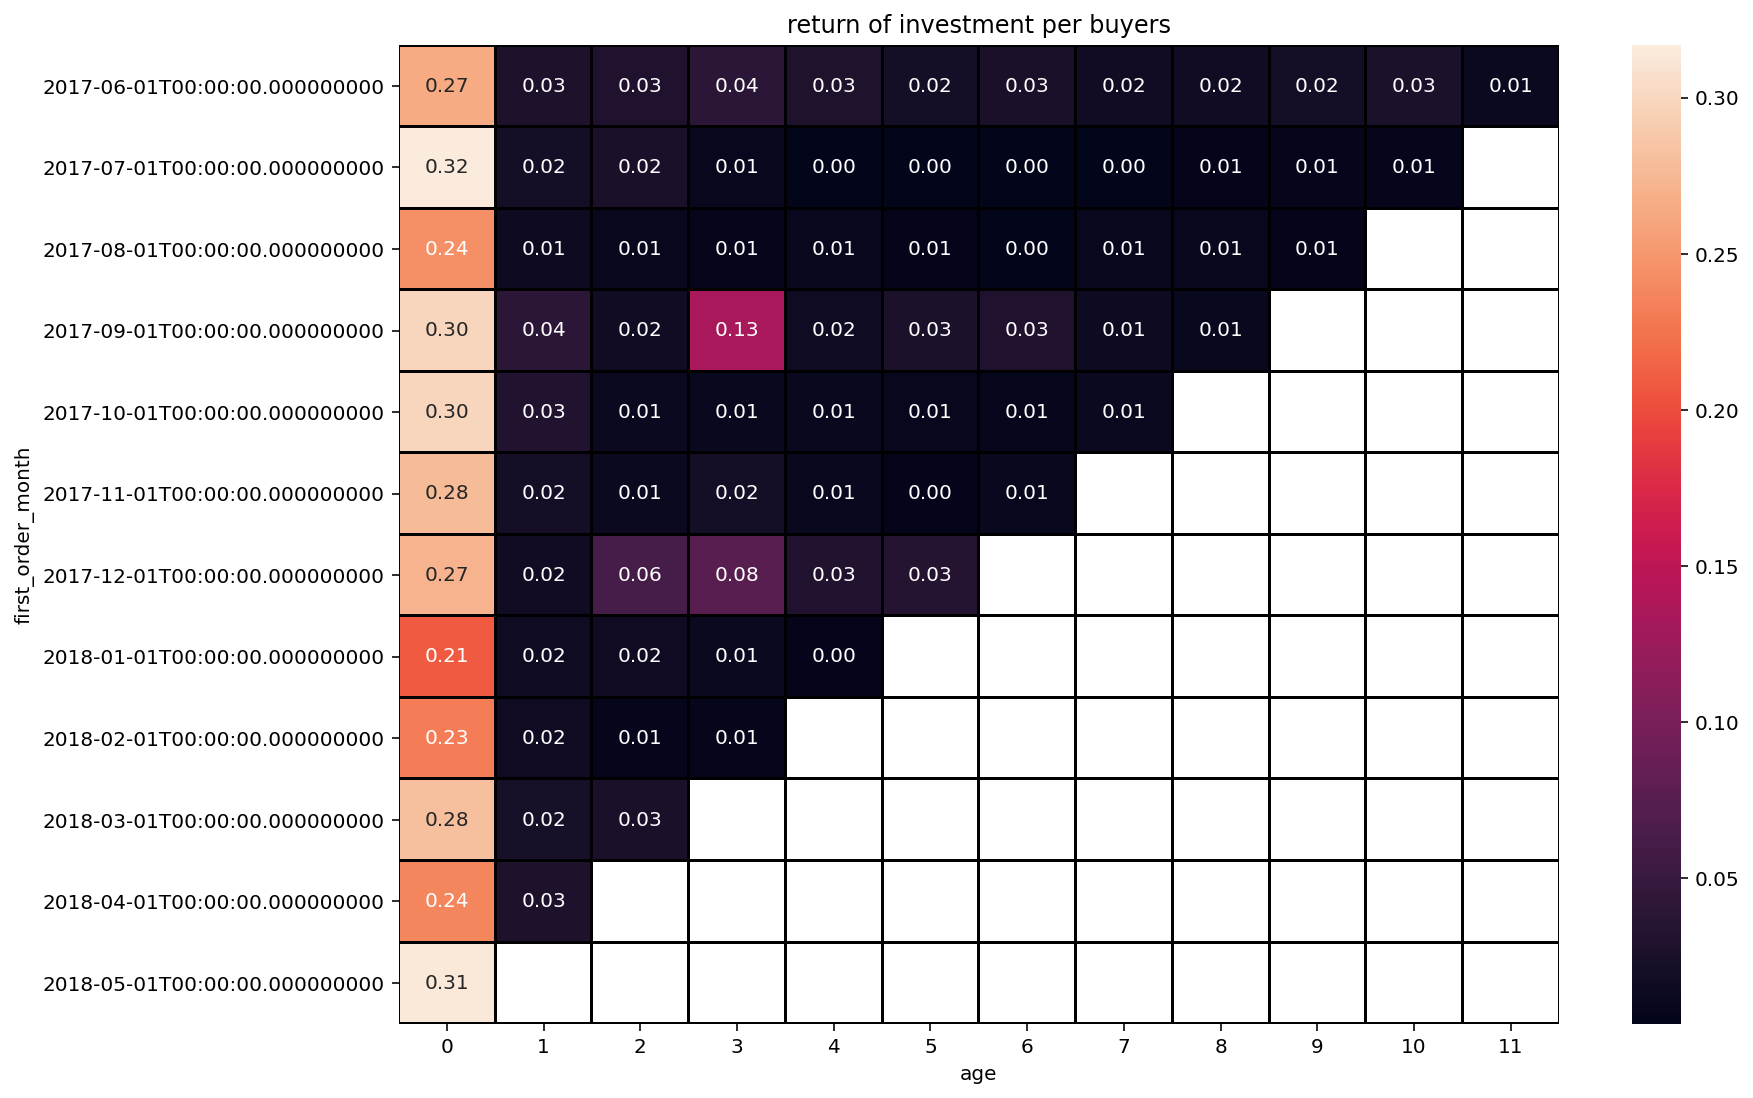

In [60]:
# to create a heatmap to view the return of investment per buyers
roi_cal = report_.pivot_table(
    index='first_order_month', 
    columns='age', 
    values='roi', 
    aggfunc='mean')
roi_cal.fillna('')
plt.figure(figsize=(13, 9))
plt.title('return of investment per buyers')
sns.heatmap(roi_cal, annot=True, fmt='.2f', linewidths=1, linecolor='black') 

### Note: ROI for the cohort

In [61]:
# the ROI 
roi_cal.cumsum(axis=1).mean(axis=0) 

age
0     0.270408
1     0.289562
2     0.313441
3     0.346515
4     0.371279
5     0.402318
6     0.401152
7     0.421310
8     0.439907
9     0.402060
10    0.461274
11    0.527337
dtype: float64

# Conclusions:
- Return of investments is not very promising, the returns are lower. this refects the loss shown

###  Task 4: marketing: Prepare the data  <a class="anchor" id="task4-bullet"></a>

In [62]:
# to create dataframe with details of source and monthly costs
cost_sourceid=data_costs.groupby(['source_id']).agg({'costs': 'sum'})
cost_sourceid=cost_sourceid.sort_values('costs', ascending=False)
cost_month=data_costs.groupby(['month']).agg({'costs': 'sum'}).reset_index()


### Task4.1 **How much money was spent? Overall/per source/over time** <a class="anchor" id="task4.1-bullet"></a>

Text(0.5, 0, 'source ID')

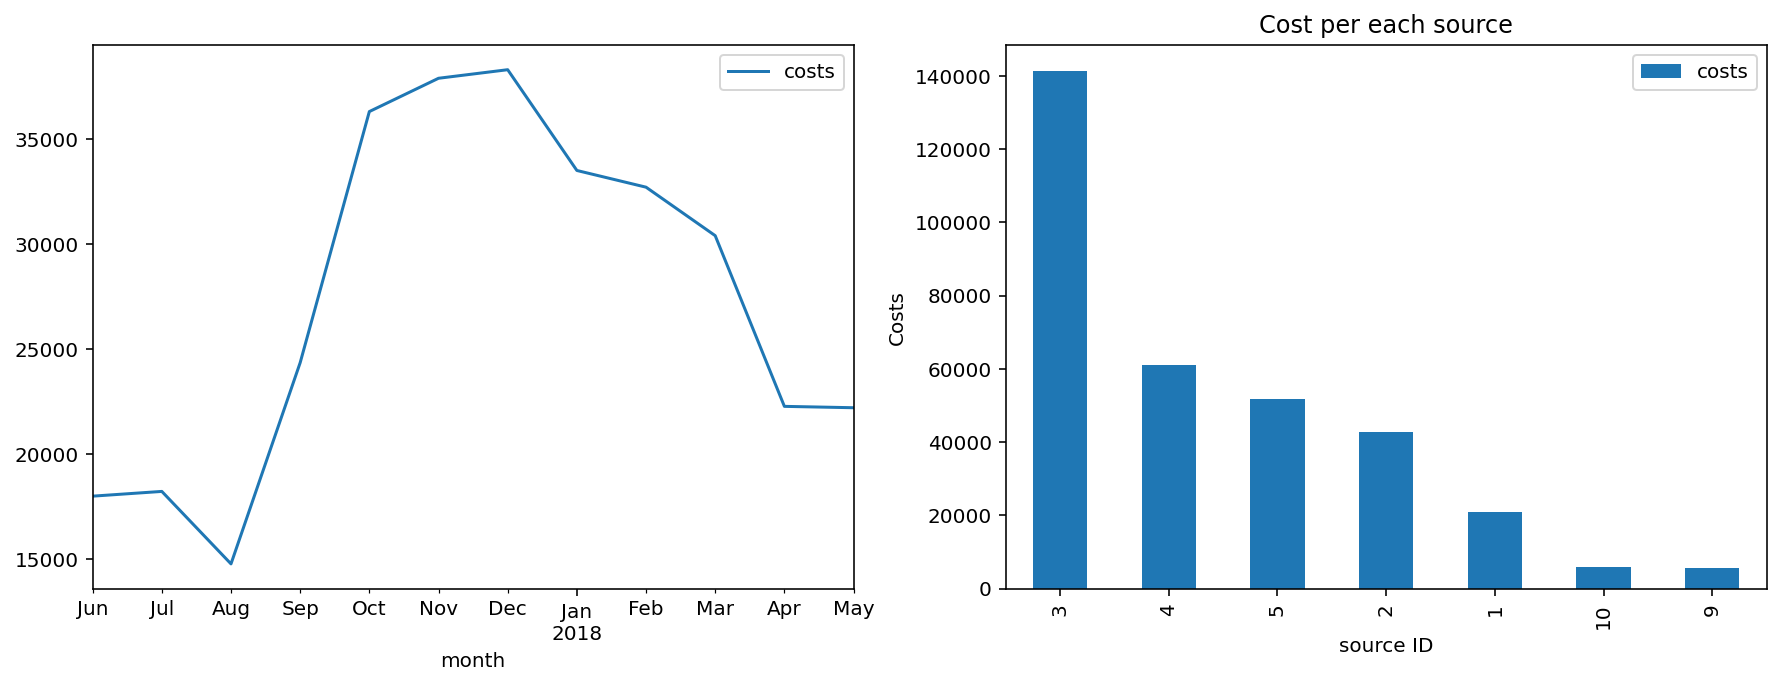

In [63]:
# plot the represntative bar plots 
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

cost_month.plot(x="month", y=["costs"], ax=ax[0])# plot costs per month 
# Set the y axis label of the current axis.
plt.ylabel('Costs')
plt.title('costs per month')
cost_sourceid.plot(kind = 'bar',title = "Cost per each source", ax=ax[1])# bar plot Cost per source 
plt.xlabel('source ID')


### Conclusions: 
- the cost for Source ID 3 is the highest followed by Source ID 4 and Source ID 5
- the cost per month for each source indicate that months 10/2017-3/2018 are the months with highest expenses 

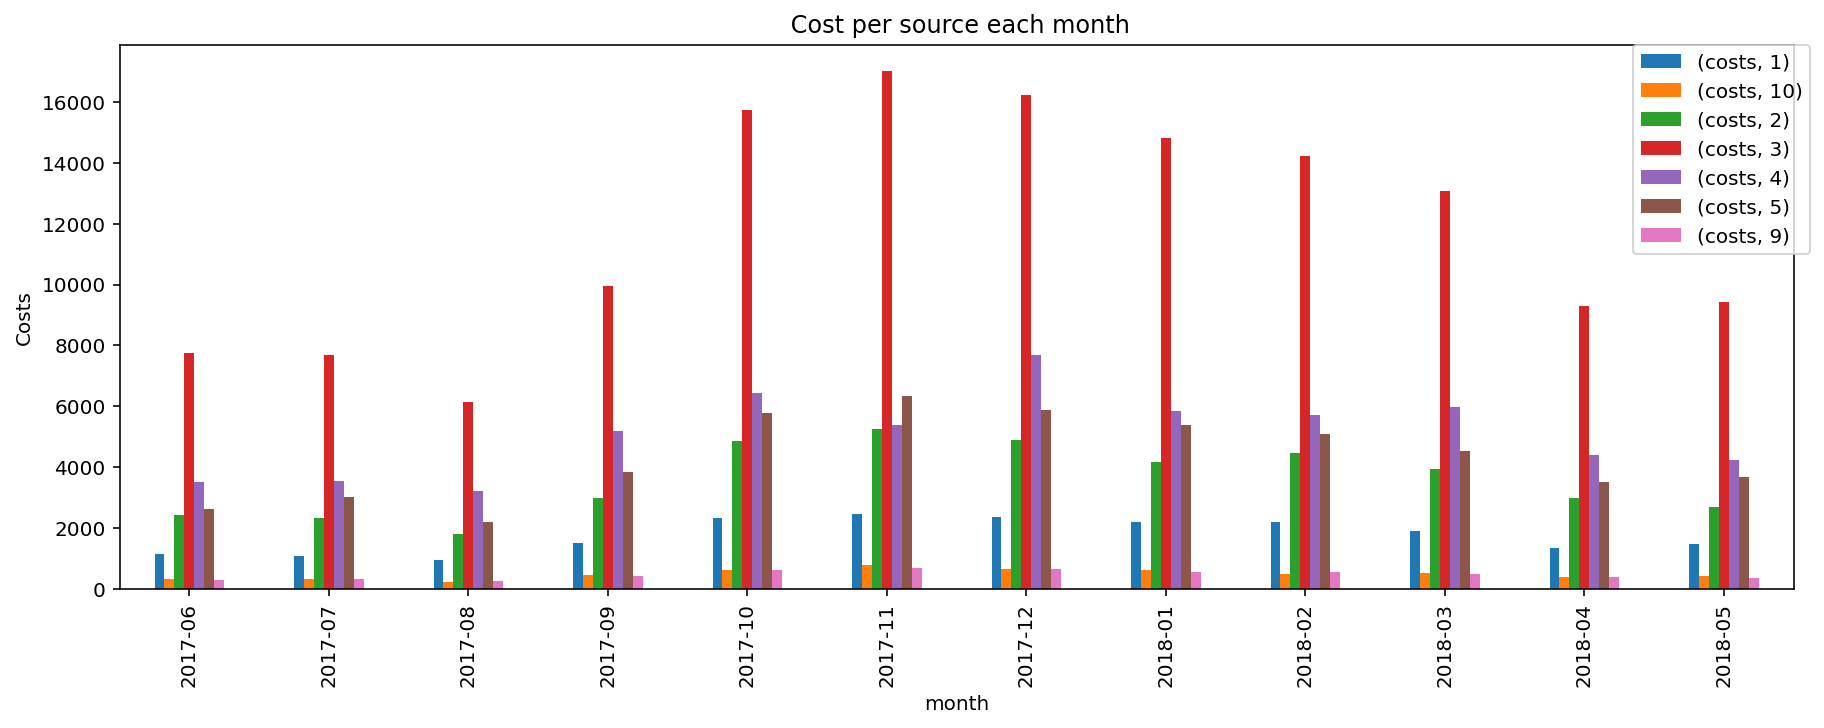

In [100]:
# to view a detailed plot of cost per sorce for each month
cost_sources=data_costs.pivot_table(index='month', columns= ['source_id'], values=['costs'], aggfunc='sum')
cost_sources.plot(kind='bar',title = " Cost per source each month")
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
fig = plt.gcf()
fig.set_size_inches( 15, 5)
plt.ylabel('Costs')
plt.show()

### Conclusions: 
- the cost for Source ID 3 is the highest followed by Source ID 4 and Source ID 5
- the cost per month for each source indicate that months 10/2017-3/2018 are the months with highest expenses 

### Task4.2 **How much did customer acquisition from each of the sources cost?** <a class="anchor" id="task4.2-bullet"></a>

In [65]:
D1_D2.head(2)# use D1_D2 a data frame with data_visits and orders 

,device,end ts,source id,start ts,uid,session_year,session_month,session_week,session_date,session_duration_sec,order_month,cohort,orderper,revenue,revenue_order
0,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,1440,2018-05,2018-03,1,2.33,2.330000
1,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017,9,35,2017-09-03,60,2017-09,2017-09,3,5.50,1.833333


In [66]:
# create reven_sou a dataframe with order month and source  
reven_sou = D1_D2.groupby(['order_month','source id' ]).agg({'revenue': 'sum' }).reset_index()
reven_sou['month']=reven_sou['order_month'].dt.month
reven_sou['source id']=reven_sou['source id'].astype('str')

In [67]:
# create dataframe from costs for source and month
total_costs=data_costs.groupby(['month','source_id']).agg({'costs': 'sum' }).reset_index()
total_costs['source id']=total_costs['source_id']
total_costs['month']=total_costs['month'].dt.month

In [68]:
# Create a data frame with the revenue and cots from each source 
D3_D4=pd.merge(reven_sou, total_costs, on=['source id','month'])

In [69]:
# Create a data frame with the buyers and sources from each month # 
data_visits_all=data_visits.groupby(['source id','session_month' ]).agg({'uid': 'count' }).reset_index()
data_visits_all['month']=data_visits_all['session_month']
data_visits_all['source id']=data_visits_all['source id'].astype('str')

In [70]:
#create all_ a data frame with CAC ROI  
all_=pd.merge(D3_D4, data_visits_all, on=['source id','month'])

In [71]:
# calculate revenue_per, CAC and ROI 
all_['LTV']=all_['revenue']/all_['uid']
all_['CAC']=all_['costs']/all_['uid']
all_['ROI']=all_['LTV']/all_['CAC']

In [72]:
#create reven_sou a data frame with CAC ROI   
all_.head(2)

,order_month,source id,revenue,month,source_id,costs,session_month,uid,LTV,CAC,ROI
0,2017-06,1,1984.92,6,1,1125.61,6,1544,1.285570,0.729022,1.763417
1,2017-06,2,2713.01,6,2,2427.38,6,2191,1.238252,1.107887,1.117670


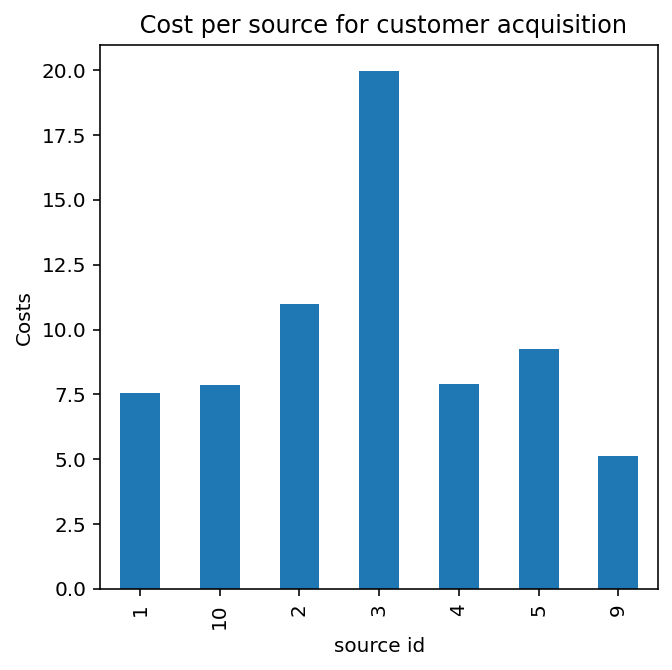

source id
1      7.569904
10     7.881960
2     10.968380
3     19.960754
4      7.914847
5      9.237931
9      5.146079
Name: CAC, dtype: float64

In [73]:
#groupby data frame with source ID and CAC   
all_CAC=all_.groupby(['source id'])['CAC'].sum()
all_CAC.plot(kind='bar',title = " Cost per source for customer acquisition")# bar plot to Cost per source for customer acquisition
fig = plt.gcf()
fig.set_size_inches( 5, 5)
plt.ylabel('Costs')
plt.show()
all_CAC

### Conclusion:
- the customer acquisition cost is the highest for source 3 
- the customer acquisition cost is the 2nd highest for source 2, 


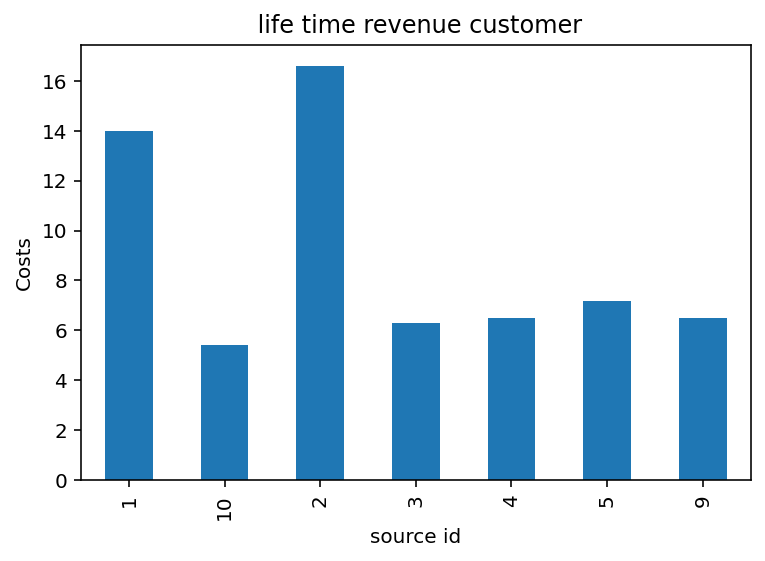

source id
1     13.995804
10     5.398081
2     16.602451
3      6.309589
4      6.510337
5      7.161811
9      6.500140
Name: LTV, dtype: float64

In [74]:
#groupby data frame with source ID and LTV 
all_ltv=all_.groupby(['source id'])['LTV'].sum()
all_ltv.plot(kind='bar',title = " life time revenue customer") # bar plot to life time revenue customer per source
fig.set_size_inches( 5, 5)
plt.ylabel('Costs')
plt.show()
all_ltv

### Conclusion:
- the life time value is the highest for source 2 and 1 
- the life time value is the low the rest

### Task 4.3 How worthwhile where the investments? (ROI)  <a class="anchor" id="task4.3-bullet"></a>

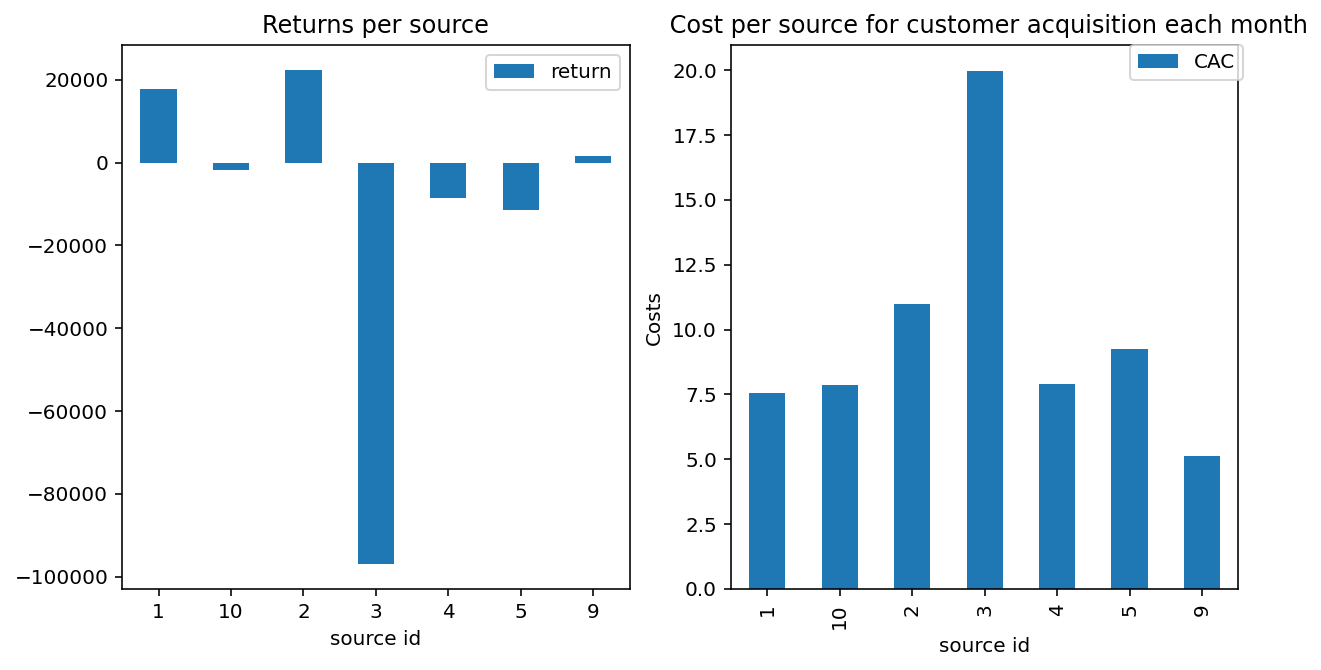

In [75]:
# create a dataframe by grouby to get the cost and revenue per source ID 
cost_=all_.groupby(['source id'])['costs'].sum()
revenu_=all_.groupby(['source id'])['revenue'].sum()

cost_sor=pd.merge(cost_,revenu_, on='source id') # merge the data frames 
cost_sor['return']=cost_sor['revenue']-cost_sor['costs'] # to get the return on invenstment
cost_sor=cost_sor.reset_index()

# plot the represntative bar plots 
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
cost_sor.plot.bar(x='source id', y='return', title= 'Returns per source',rot=0, ax=ax[0])
plt.ylabel('returns money')

all_CAC.plot(kind='bar',title = " Cost per source for customer acquisition each month", ax=ax[1])
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

fig.set_size_inches( 10, 5)
plt.ylabel('Costs')
plt.show()

### conclusion:

- Clearly we notice that Sources 3 is not good investment as the CAC is high 
- simialrly Sources 4 and Sources 5
- source 1 and 2 are good for the returns 

In [76]:
# dataframe with uid and source ID  
ui_sor=D1_D2.groupby(['source id']).agg({'uid': 'nunique'}).reset_index()
ui_sor['source id']=ui_sor['source id'].astype('str')

In [77]:
# merge the above dataframe to calculate the ROI 
sor_roi= pd.merge(ui_sor, cost_sor, on='source id')
sor_roi['ltv'] = sor_roi['revenue'] / sor_roi['uid'] # calculate LTV 
sor_roi['cac'] = sor_roi['costs'] / sor_roi['uid']# calculate CAC 
sor_roi['ROI']=sor_roi['ltv'] /sor_roi['cac'] # calculate ROI

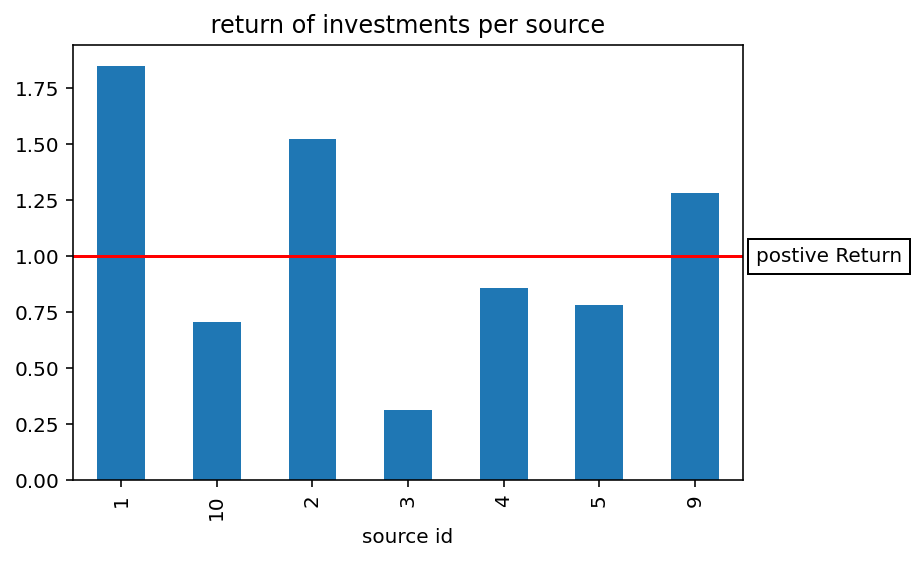

In [78]:
# plot the ROI per source ID 
sor_roi_plot=sor_roi.groupby(['source id'])['ROI'].sum()
ax=sor_roi_plot.plot(kind='bar',title = " return of investments per source ")
ax.axhline(1, color="red")
ax.text(1.02, 1, "postive Return", va='center', ha="left", bbox=dict(facecolor="w",alpha=1),
        transform=ax.get_yaxis_transform())
plt.show()

### Conclusion:
- Clearly we notice that Sources 1, Sources 2 and Sources 9 show return
- Sources 3 has a poor return
- sources 10, 4 and 5 also have poor return

### Task 5 Conclusion: advise marketing experts how much money to invest and where 
### Source / Platform recommend <a class="anchor" id="task5-bullet"></a>

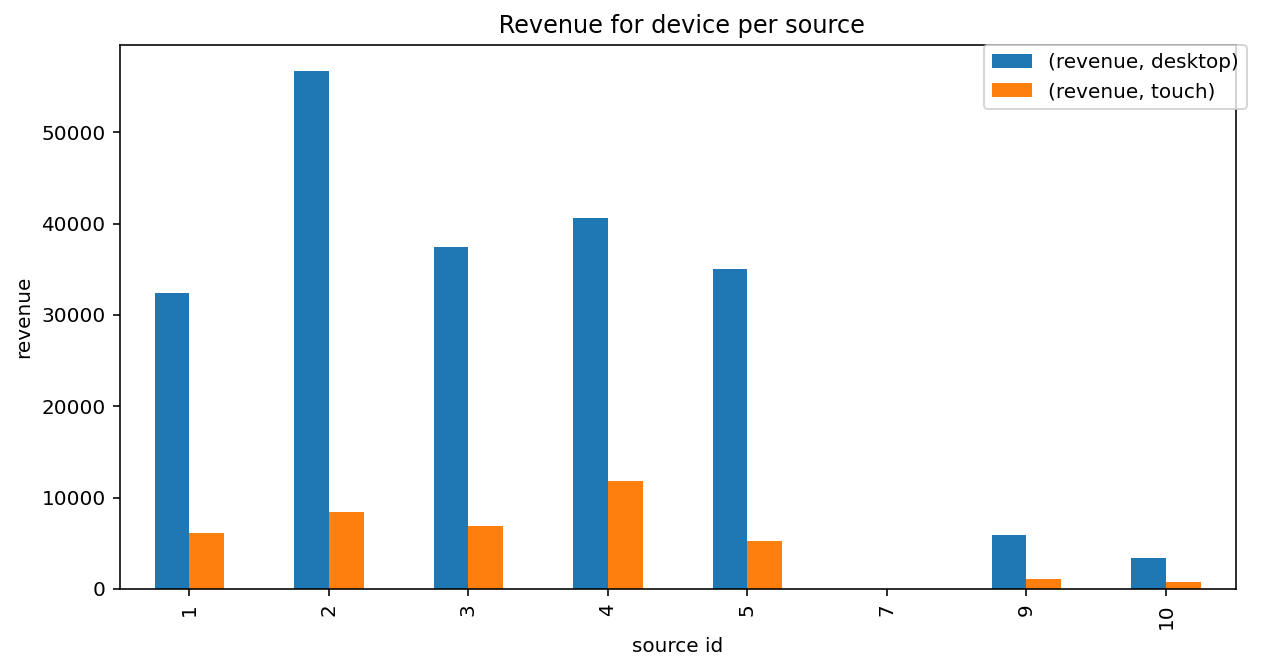

In [79]:
# to create dataframe with details of device and source
Device_sou=D1_D2.pivot_table(index='source id', columns= ['device'], values=['revenue'], aggfunc='sum')

# plot the represntative bar plots 
Device_sou.plot(kind='bar',title = " Revenue for device per source")
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
fig = plt.gcf()
fig.set_size_inches( 10, 5)
plt.ylabel('revenue')
plt.show()


### conclusion: 
- Buyers preferred to use destop to make there purchases
- Buyers prefered source 2 while purchaing over the desktop 
- Buyers prefered source 4 while purchaing over the touch

- this is in line with the higher time spent on desktop rather than touch

### Current revenue/costs and user rentention <a class="anchor" id="task5.1-bullet"></a>

### Metrics to view for future investments <a class="anchor" id="task5-bullet"></a>

Text(0.5, 1.0, 'user rentention')

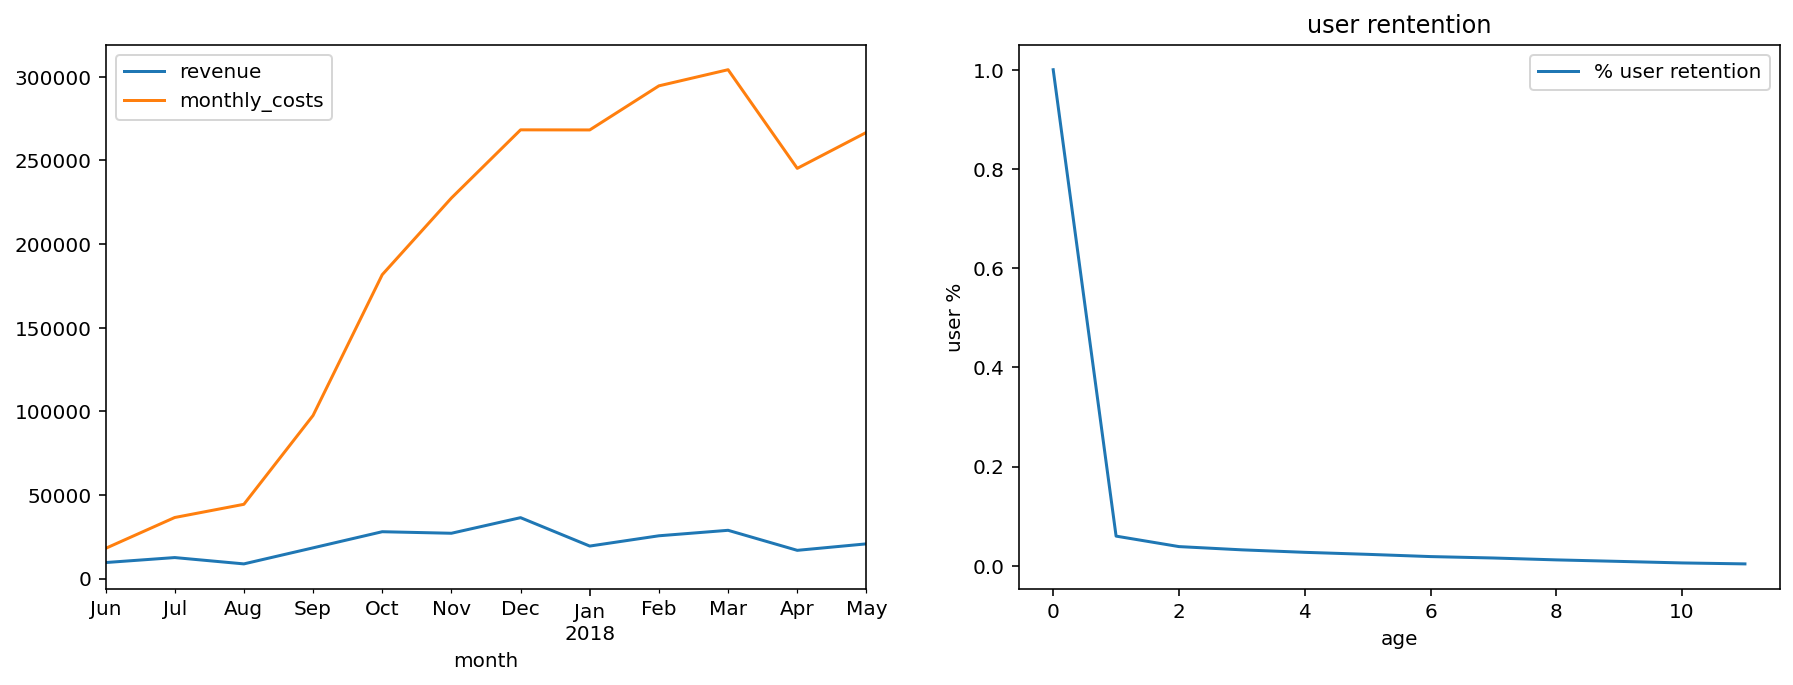

In [80]:
# to create dataframe with details of month and revenue and costs
# use data frame report that contains revenue 
# use data frame report_ that contains monthly costs
x=report.groupby(['month'])['revenue'].sum()
y=report_.groupby(['month'])['monthly_costs'].sum()
rev_cost=pd.merge(x,y, on='month').reset_index() # merge the data sets

# plot the represntative bar plots 
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

rev_cost.plot(x="month", y=["revenue","monthly_costs"], ax=ax[0])
retention_mean_per_age.plot(x="age", y=["% user retention"], ax=ax[1])
plt.ylabel('user %')
plt.title('user rentention')


### conclusion: 
- Clearly we notice that the costs are higher compared to the revenue 
-   the decrease in user rentention reflects the lower revenue

### note: to increase the revenue we need to view
- 1: revenue per sorce 
- 2: CAC Cost per source for customer acquisition
- 3: ROI return of investments per source 

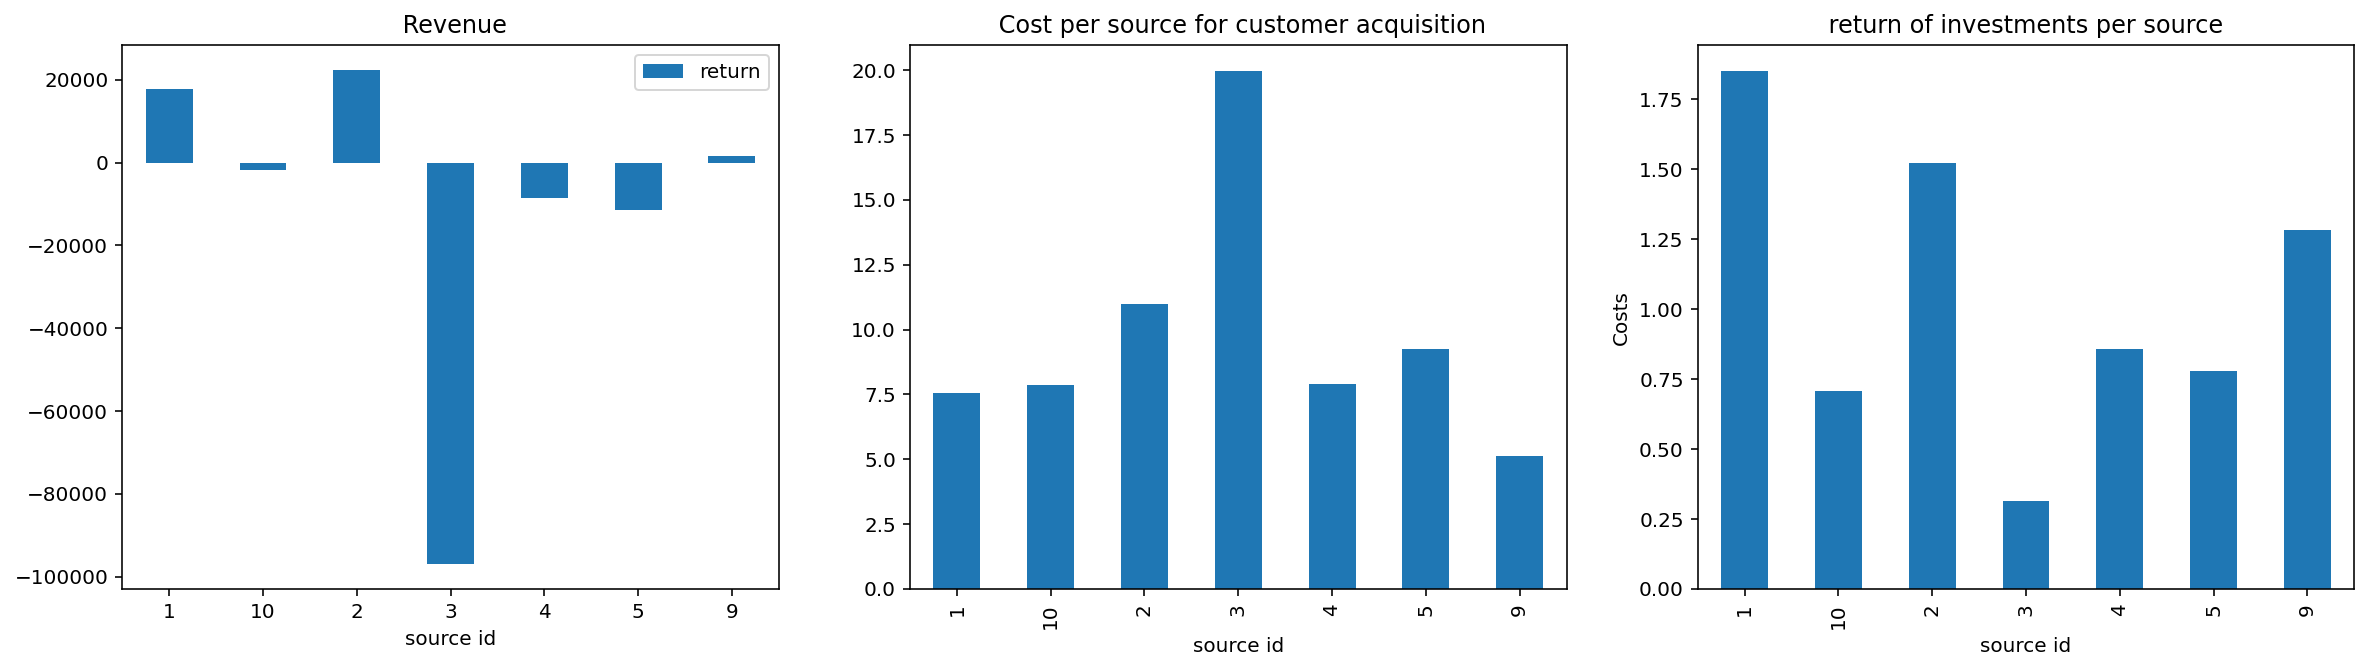

In [81]:
# plot the represntative line plots 
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
cost_sor.plot.bar(x='source id', y='return', title= ' Revenue',rot=0, ax=ax[0])
plt.ylabel('returns money')

all_CAC.plot(kind='bar',title = " Cost per source for customer acquisition", ax=ax[1])
plt.ylabel('Costs')

sor_roi_plot.plot(kind='bar',title = " return of investments per source ",ax=ax[2] )
plt.show()

### Conclusion:
- Clearly we notice that Sources 1, Sources 2 and Sources 9 show return Revenue and return of investments
- Sources 3 has a poor return
- sources 10, 4 and 5 also have poor return

### note: Table to understand the current ROI per source and to focus to increase the revenue 

In [82]:
# dataset that provide us details on the current investments
sor_roi.sort_values('ROI', ascending= False)

,source id,uid,costs,revenue,return,ltv,cac,ROI
0,1,3743,20833.27,38560.06,17726.79,10.301913,5.565928,1.850889
1,2,4323,42806.04,65152.26,22346.22,15.071076,9.901929,1.522034
5,9,1415,5517.49,7076.98,1559.49,5.001399,3.899286,1.282645
3,4,9823,61073.60,52479.75,-8593.85,5.342538,6.217408,0.859287
4,5,6839,51757.10,40357.91,-11399.19,5.901142,7.567934,0.779756
6,10,1241,5822.49,4111.34,-1711.15,3.312925,4.691773,0.706114
2,3,9138,141321.63,44317.68,-97003.95,4.849823,15.465269,0.313594


In [83]:
print('current return:', sor_roi['return'].sum())

current return: -77075.64000000006


### Note:
- Inorder to help the marketing team the current table ROI needs to be 1 and above
- Focus should be on source ID 1 and 2 to get more customers 

### conclusion: 
- We need to bring the ROI to 1 and above
- we will need to invest in source ID 1, 2 and 9 
- focus on customer acquisition with lower investments like source 1 and source 9  
- avoid Sources 3 is not good investment as the CAC is high 


# Overall Conclusions <a class="anchor" id="task5.3-bullet"></a>

- the Revenue and costs have been at a difference from the start and have only increased. 
- user retention is very low
- the life time value is realtively low 
- the investmen on source 3 is high with low returns 


- Focus on desktop users since they bring in most of the revenue
- retention of users is very low increase time spent on the platforms
- the current CAC rate monthly is high compared to the LTV 
- Focus on sources like 1, 2 and 9 to increase revenue 

- the orders peaked in the month of 10/2017 to 12/2017 find out the reasons for such a peak

